In [2]:
# Netflix project ----------------------

In [3]:
# Import all libraries -- because utilize the functions of these libraries use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read file of Netflix ----
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# How many rows and columns in their data.
df.shape

(8807, 12)

In [6]:
# find out all columns names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# change one column name into another
df.rename(columns={"listed_in": "genre"}, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [8]:
# only once run these steps --- replace, setindex, etc

In [9]:
# Dropping the show_id column as it may be of no use in the analysis
df.drop(columns = 'show_id',inplace=True)

In [10]:
# checking duplicate values
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool>

In [11]:
# Find null values or checking the missing values.
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [12]:
# Dropping the rows which have null values in date_added column as there are only 10 values which sums up to only 0.11% 
df.dropna(subset=['date_added'], inplace=True)
df['date_added'].isna().sum()

0

In [13]:
# Dropping the rows which have null values in rating column as there are only 4 values which sums up to only 0.05% 
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [14]:
# Dropping the rows which have null values in duration column as there are only 3 values which sums up to only 0.03%
df.dropna(subset = ['duration'], inplace = True)
df['duration'].isna().sum()

0

In [15]:
df.isna().sum()

type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [17]:
# Convert date_added to date time
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [18]:
df['date_added'].isna().sum()

88

In [19]:
df.dropna(subset = ['date_added'], inplace=True)
df['date_added'].isna().sum()

0

In [20]:
# Adding day, month, year, month_name, day_name as seperate columns to the dataframe as these will help us in analysis
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [21]:

df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [22]:
# unique of Rating
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [23]:
df['rating'].isna().sum()

81

In [24]:
df.dropna(subset = ['rating'], inplace = True)
df['rating'].isna().sum()

0

In [25]:

df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [26]:
df.shape

(8621, 16)

In [27]:
df.dropna(subset = ['director', 'country', 'cast'], how ='all', inplace=True)
df.shape

(8525, 16)

In [28]:
df.isna().sum()

type               0
title              0
director        2439
cast             704
country          730
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
day                0
month              0
year               0
month_name         0
weekday            0
dtype: int64

In [29]:
df['cast'][2]

'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'

In [30]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
df_cast = df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 63644, dtype: object

In [32]:
df_cast = pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[63644 rows x 1 columns]

In [33]:
df_cast.reset_index(inplace=True)
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
63639,Zubaan,3,Manish Chaudhary
63640,Zubaan,4,Meghna Malik
63641,Zubaan,5,Malkeet Rauni
63642,Zubaan,6,Anita Shabdish


In [34]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [35]:
df_cast.columns = ['title','cast']

In [36]:
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [37]:
df_cast.replace('nan', np.nan, inplace=True)
df_cast.isna().sum()

title      0
cast     704
dtype: int64

In [38]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace = True)
df_genre = df_genre[['title',0]]
df_genre.columns = ['title', 'genre']
df_genre.replace('nan', np.NaN, inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [39]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[['title',0]]
df_director.columns = ['title', 'director']
df_director.replace('nan', np.NaN, inplace=True)
df_director.isna().sum()

title          0
director    2439
dtype: int64

In [40]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(), index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[['title',0]]
df_country.columns = ['title', 'country']
df_country.replace('nan', np.NaN, inplace=True)
df_country.isna().sum()

title        0
country    730
dtype: int64

In [41]:
df12 = df_cast.merge(df_genre , on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [42]:
df123 = df_director.merge(df12, on = 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [43]:
df1234 = df_country.merge(df123, on='title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [44]:
df_new = df.merge(df1234, on='title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [45]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director',
                       'cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [46]:
df_new.shape

(198404, 16)

In [47]:
df_new.isna().sum()

type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
description         0
day                 0
month               0
year                0
month_name          0
weekday             0
country         11699
director        48645
cast             1882
genre               0
dtype: int64

In [48]:
df_new['cast'] = df_new['cast'].replace(np.nan, 'Unknown')
df_new['country']= df_new['country'].replace(np.nan, 'Unknown')
df_new['director'] = df_new['director'].replace(np.nan, 'Unknown')

In [49]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [50]:
df_new.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198404 entries, 0 to 198403
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          198404 non-null  object        
 1   title         198404 non-null  object        
 2   date_added    198404 non-null  datetime64[ns]
 3   release_year  198404 non-null  int64         
 4   rating        198404 non-null  object        
 5   duration      198404 non-null  object        
 6   description   198404 non-null  object        
 7   day           198404 non-null  int32         
 8   month         198404 non-null  int32         
 9   year          198404 non-null  int32         
 10  month_name    198404 non-null  object        
 11  weekday       198404 non-null  object        
 12  country       198404 non-null  object        
 13  director      198404 non-null  object        
 14  cast          198404 non-null  object        
 15  genre         198

In [52]:
df_new.duplicated().sum()

55

In [53]:
# In the new dataframe, here 55 duplicate values, so deleting it.
df_new.drop_duplicates(keep = 'first', inplace=True)

In [54]:
df_new.shape

(198349, 16)

In [55]:
df_new.count()

type            198349
title           198349
date_added      198349
release_year    198349
rating          198349
duration        198349
description     198349
day             198349
month           198349
year            198349
month_name      198349
weekday         198349
country         198349
director        198349
cast            198349
genre           198349
dtype: int64

In [56]:
df_new.shape

(198349, 16)

In [57]:
df_movies = df_new.loc[df_new['type'] == 'Movie']
df_tvs = df_new.loc[df_new['type'] == 'TV Show']

In [58]:
df_movies.shape

(144240, 16)

In [59]:
df_tvs.shape

(54109, 16)

In [60]:
df_movies['duration']

0          90 min
157        91 min
158        91 min
159        91 min
160        91 min
           ...   
198399    111 min
198400    111 min
198401    111 min
198402    111 min
198403    111 min
Name: duration, Length: 144240, dtype: object

In [61]:
df_movies['duration'] = df_movies['duration'].str.replace('min', "")
df_movies.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [62]:
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons', "")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season', "")
df_tvs.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [63]:
df_tvs.rename(columns={"duration":"seasons"},inplace=True)

In [64]:
df_tvs.head()

,type,title,date_added,release_year,rating,seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


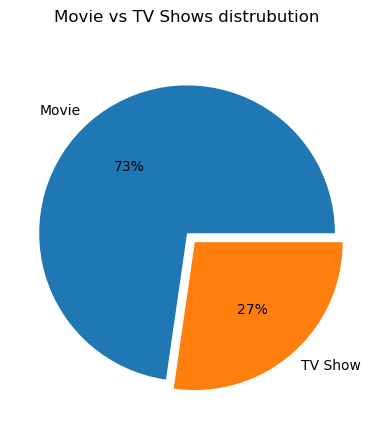

In [65]:
# Labels = ['Movie', 'TV show']
plt.pie(df_new['type'].value_counts(), labels = df_new['type'].value_counts().index,
       explode = (0.08, 0), autopct = '%0.0f%%')
plt.suptitle("Movie vs TV Shows distrubution")
plt.show()
# plt.savefig("1.png")

In [66]:
df_temp = df_new.drop_duplicates(subset = ['country', 'title'])
x = df_temp['country'].value_counts().head(10)

In [67]:
x

country
United States     3596
India             1038
United Kingdom     772
Unknown            730
Canada             427
France             383
Japan              313
Spain              228
Germany            223
South Korea        222
Name: count, dtype: int64

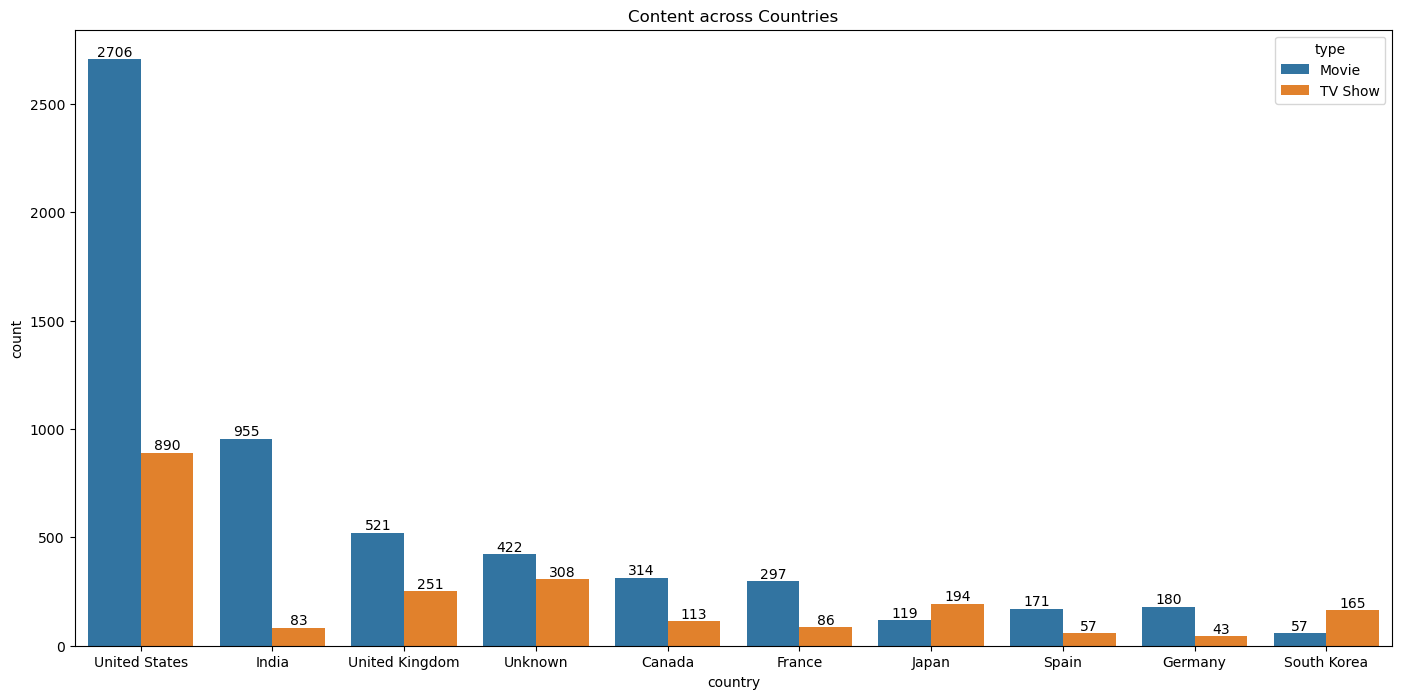

In [68]:
df_temp = df_new.drop_duplicates(subset = ['country', 'title'])
x = df_temp['country'].value_counts().head(10)

plt.figure(figsize = (17, 8)) # it is use for size of canvas.
plt.title('Content across Countries')
label = sns.countplot(data = df_temp, x = 'country', hue = 'type', order = x.index) 
for i in label.containers:
    label.bar_label(i)

plt.show()
# plt.savefig('2.jpg')

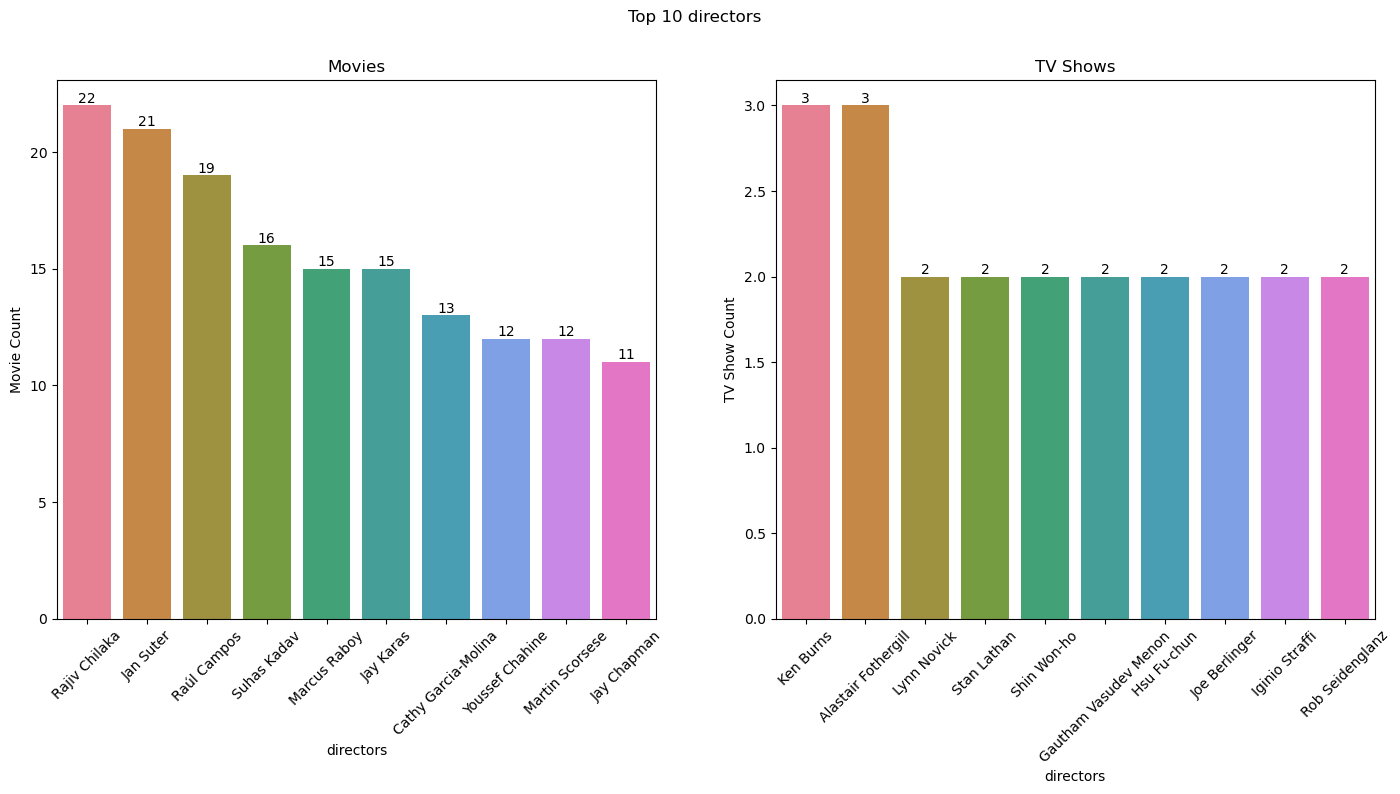

In [69]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director', 'title'])

plt.figure(figsize = (17, 7))
plt.suptitle('Top 10 directors')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies_temp, x = 'director', 
                      order = df_movies_temp['director'].value_counts()[1:11].index, palette='husl' ) 

for i in label.containers:
    label.bar_label(i)

plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('directors')
plt.ylabel('Movie Count')


plt.subplot(1,2,2)
label = sns.countplot(data = df_tvs_temp, x = 'director',
                      order = df_tvs_temp['director'].value_counts()[1:11].index, palette='husl', )  # find some more options then use "shift + tab".

for i in label.containers:
    label.bar_label(i)

plt.title('TV Shows')
plt.xticks(rotation = 45)
plt.xlabel('directors')
plt.ylabel('TV Show Count')

plt.show()
# plt.savefig('2.jpg')

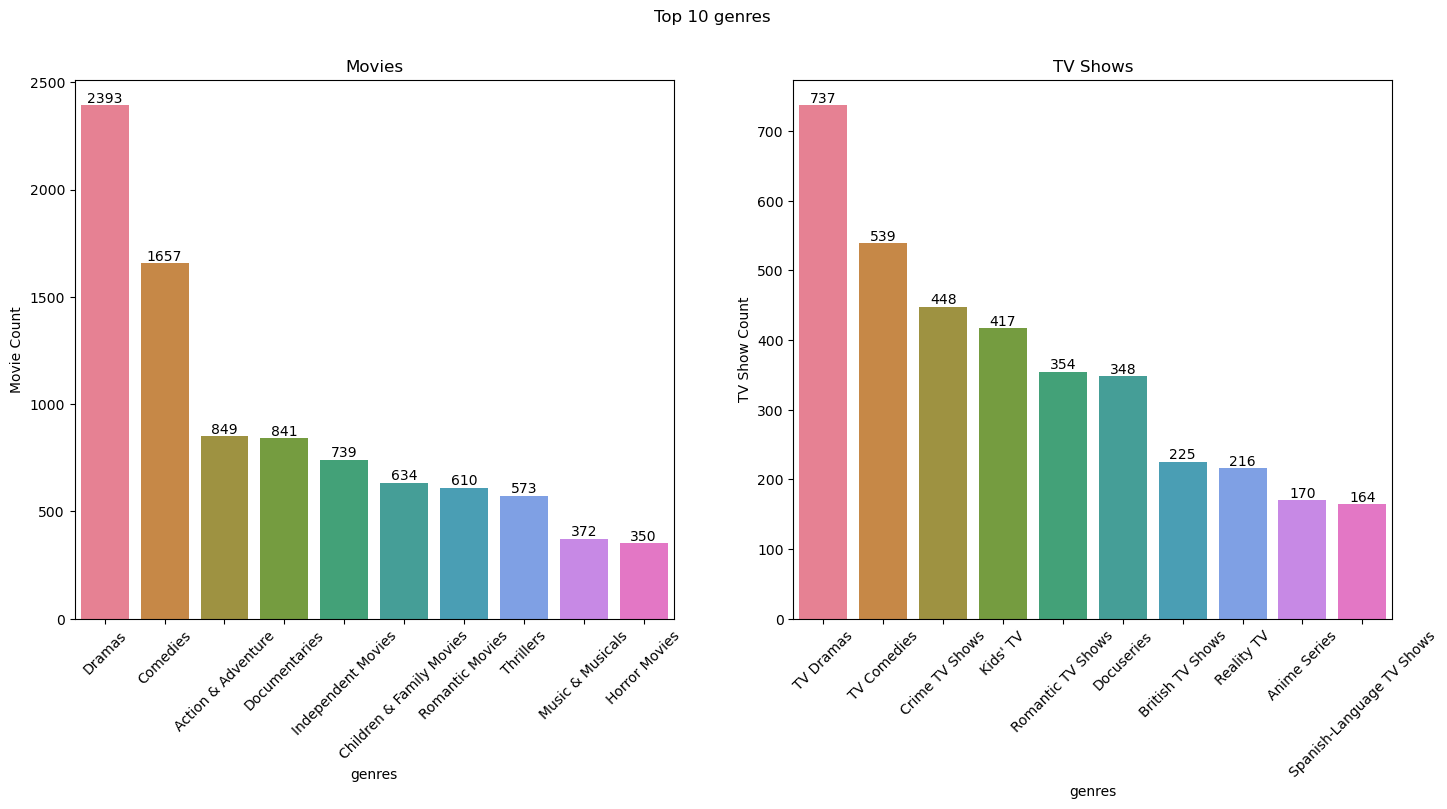

In [70]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre', 'title'])

plt.figure(figsize = (17, 7))
plt.suptitle('Top 10 genres')

plt.subplot(1,2,1)
label = sns.countplot(data = df_movies_temp, x = 'genre', 
                      order = df_movies_temp['genre'].value_counts()[1:11].index, palette='husl' ) 

for i in label.containers:
    label.bar_label(i)

plt.title('Movies')
plt.xticks(rotation = 45)
plt.xlabel('genres')
plt.ylabel('Movie Count')


plt.subplot(1,2,2)
label = sns.countplot(data = df_tvs_temp, x = 'genre',
                      order = df_tvs_temp['genre'].value_counts()[1:11].index, palette='husl', )  # find some more options then use "shift + tab".

for i in label.containers:
    label.bar_label(i)

plt.title('TV Shows')
plt.xticks(rotation = 45)
plt.xlabel('genres')
plt.ylabel('TV Show Count')

plt.show()
# plt.savefig('2.jpg')

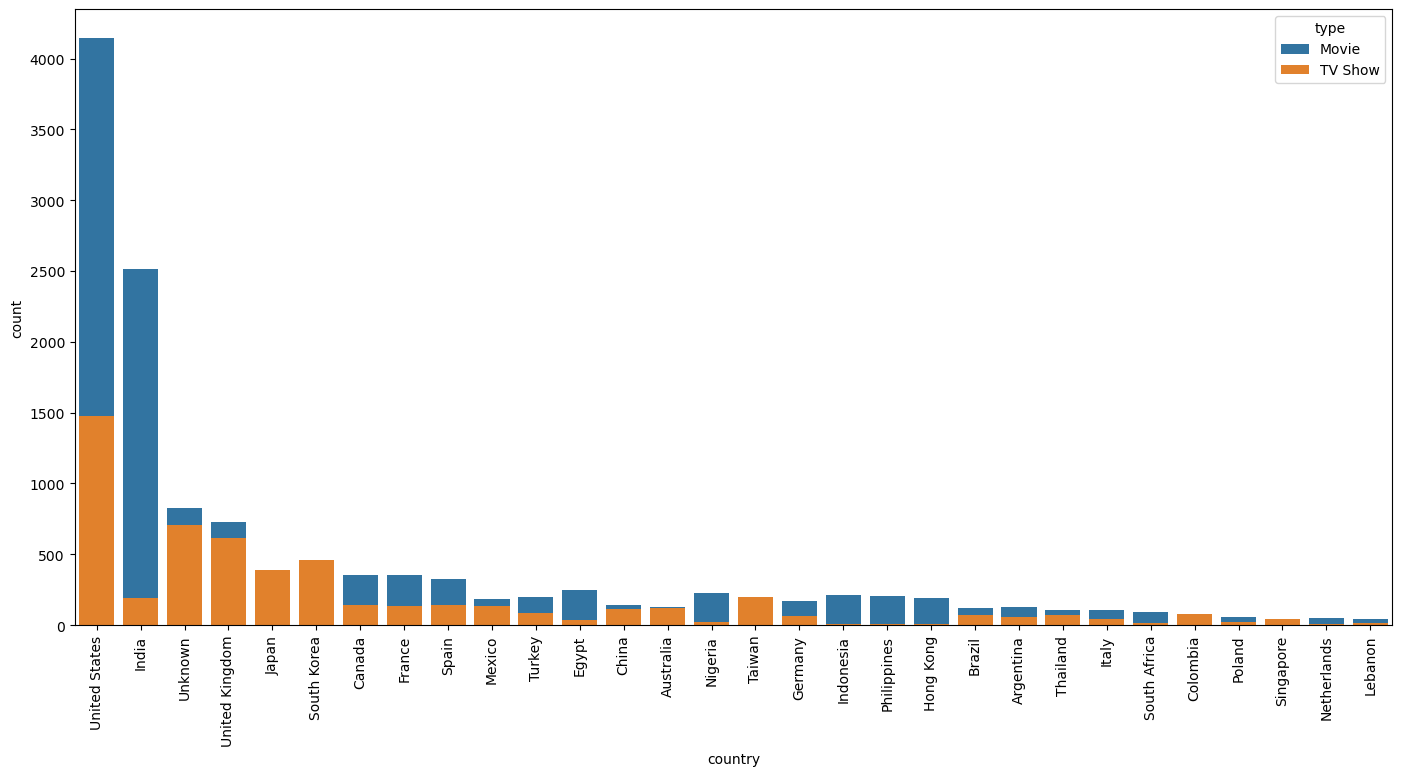

In [71]:
# stacked graph
df_temp = df_new.drop_duplicates(subset = ['genre', 'title'])
plt.figure(figsize = (17, 8))
plt.xticks(rotation = 90)
sns.countplot(data = df_temp, x = 'country', hue = 'type', dodge = False,
             order = df_temp['country'].value_counts().head(30).index)
plt.show()

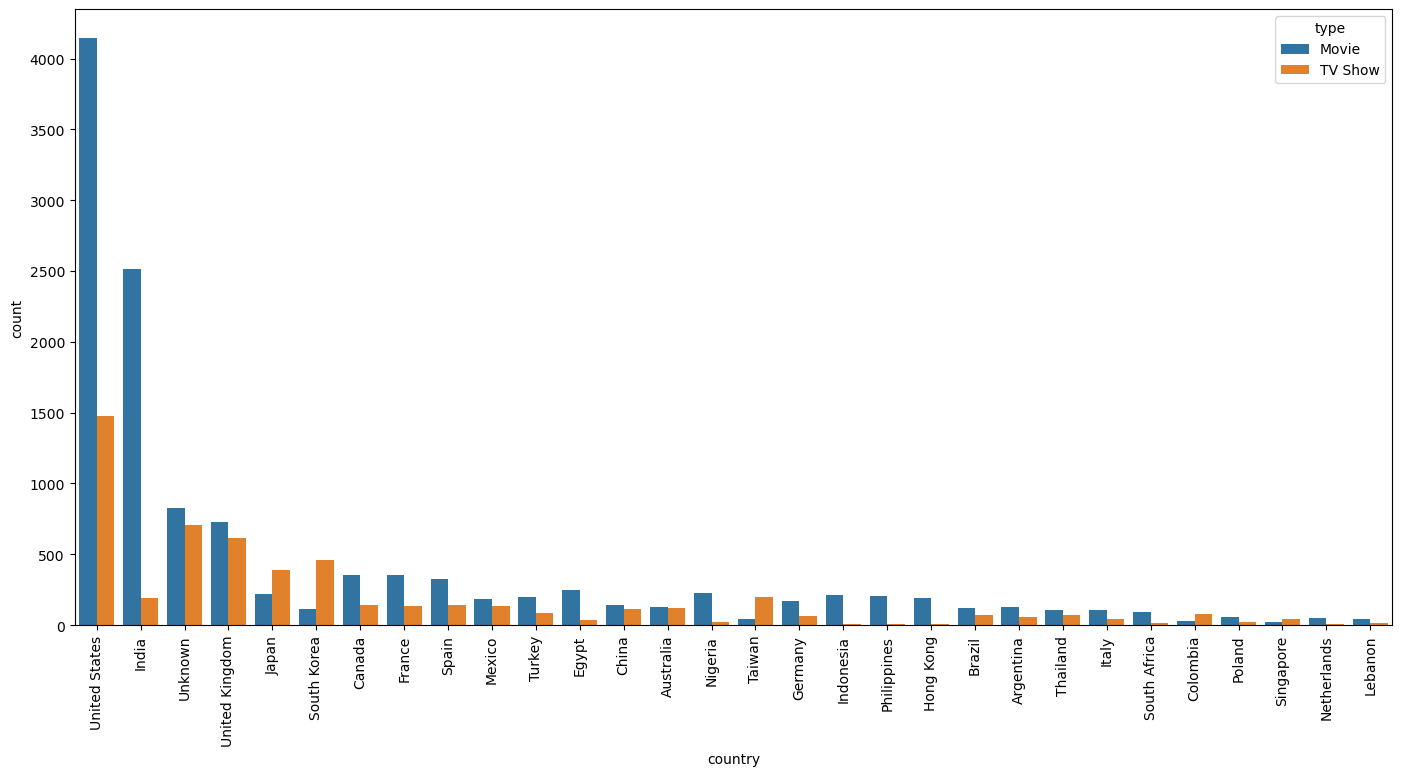

In [72]:
df_temp = df_new.drop_duplicates(subset = ['genre', 'title'])
plt.figure(figsize = (17, 8))
plt.xticks(rotation = 90)
sns.countplot(data = df_temp, x = 'country', hue = 'type', dodge = True, # here dodge is True, and upper is false
             order = df_temp['country'].value_counts().head(30).index)
plt.show()

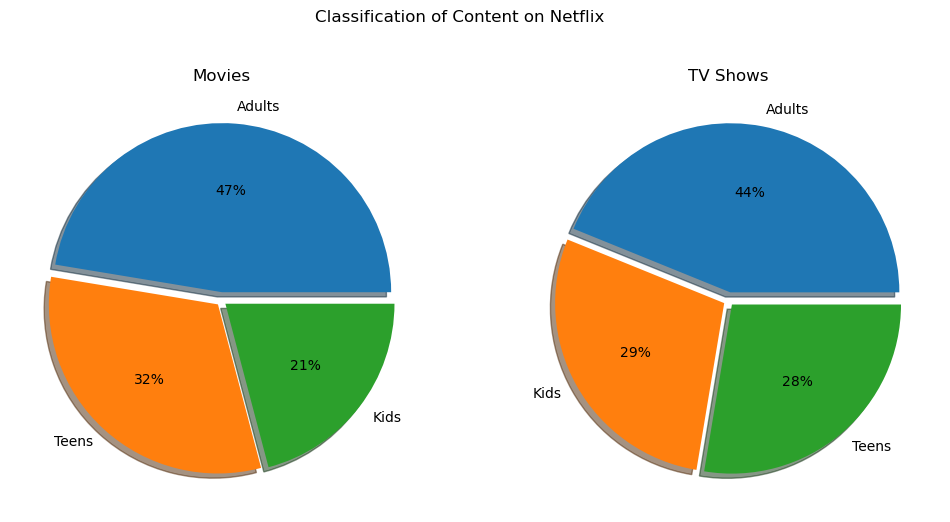

In [73]:
df_movies_temp = df_movies.drop_duplicates(subset = ['rating', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating', 'title'])

plt.figure(figsize = (12, 6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index,
       autopct = '%.0f%%', explode = (0.05,0.03,0.03), shadow = True)  
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index, 
       autopct = '%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('TV Shows')
plt.show()

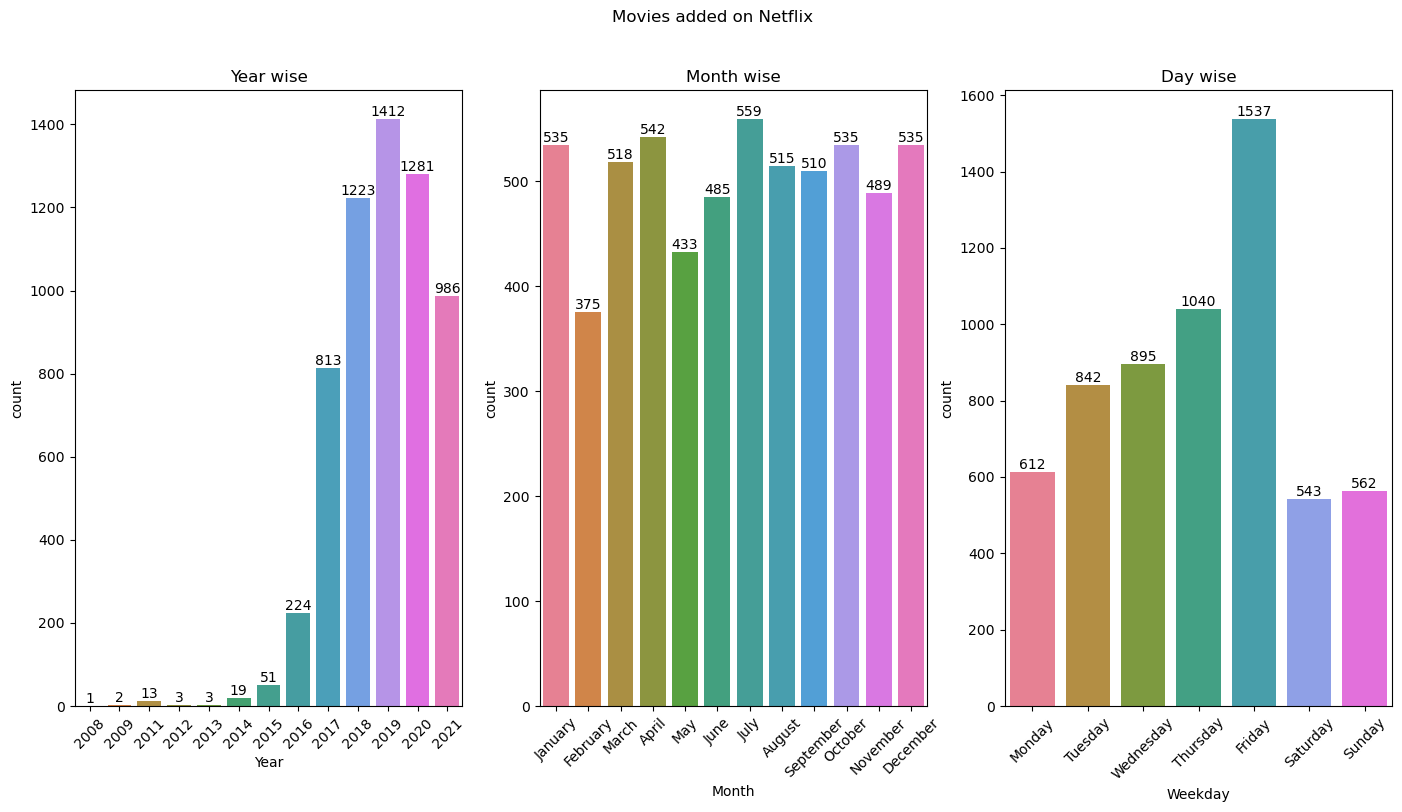

In [74]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 
               'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')


plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

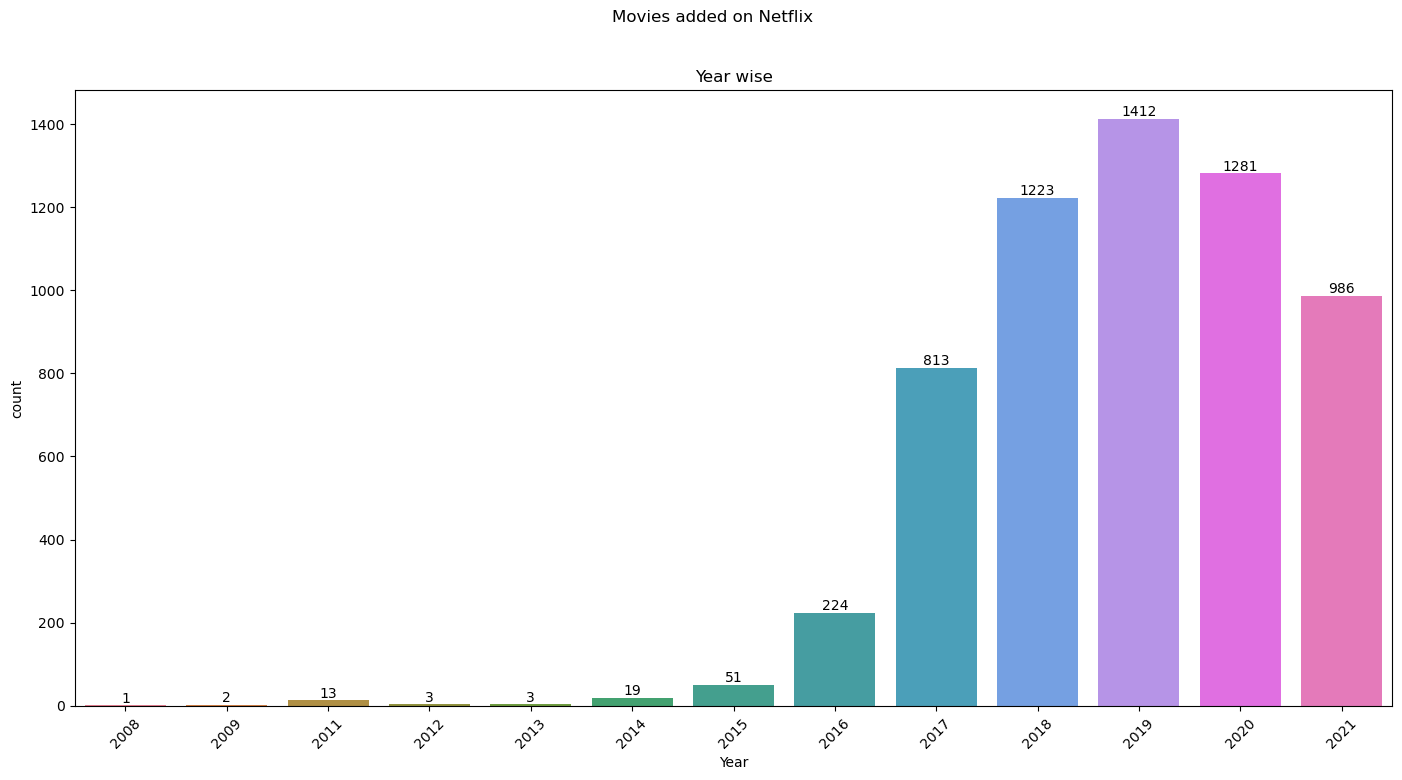

In [85]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])
mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')


label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.show()

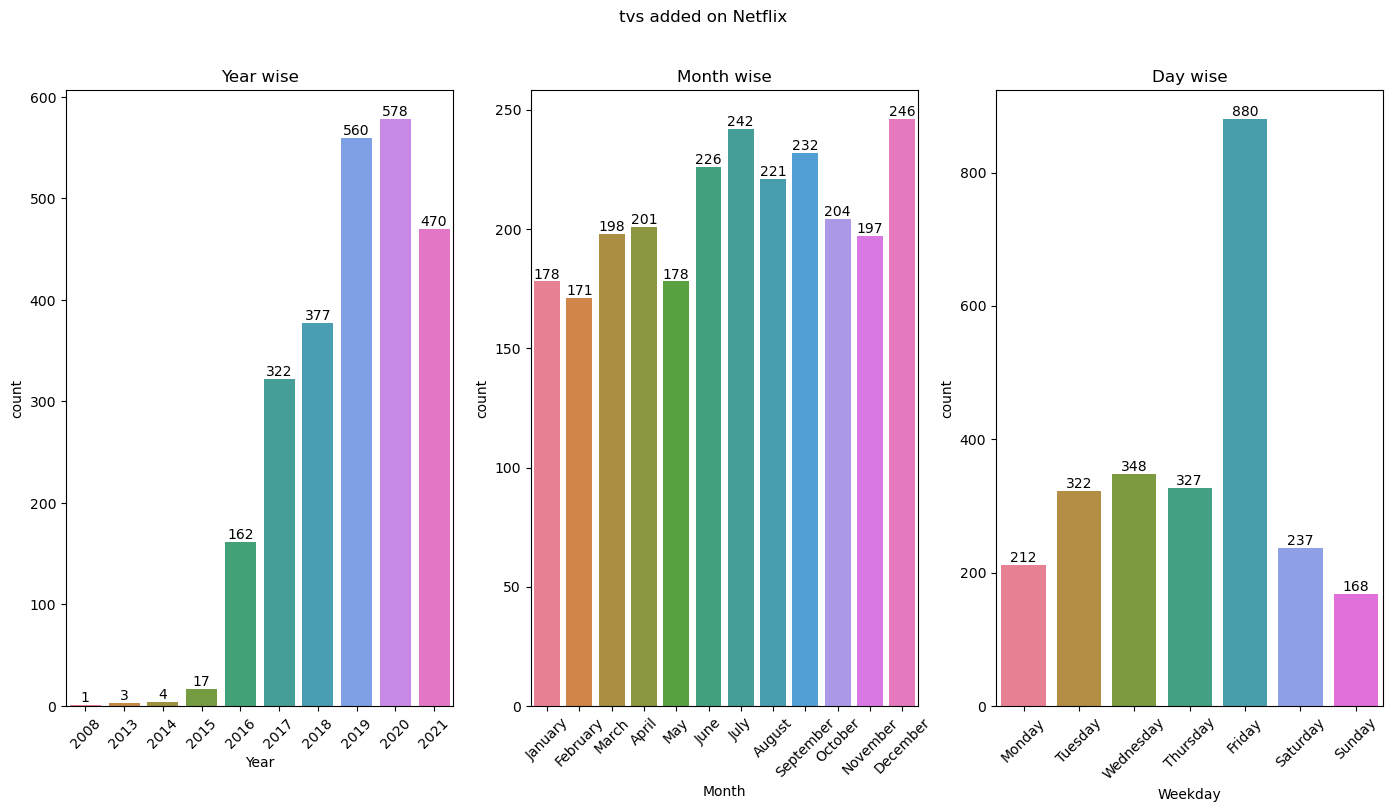

In [76]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])


tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 
               'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('tvs added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year', order = tv_year.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name', order = tv_month.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')


plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday', order = tv_day.index, palette='husl')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

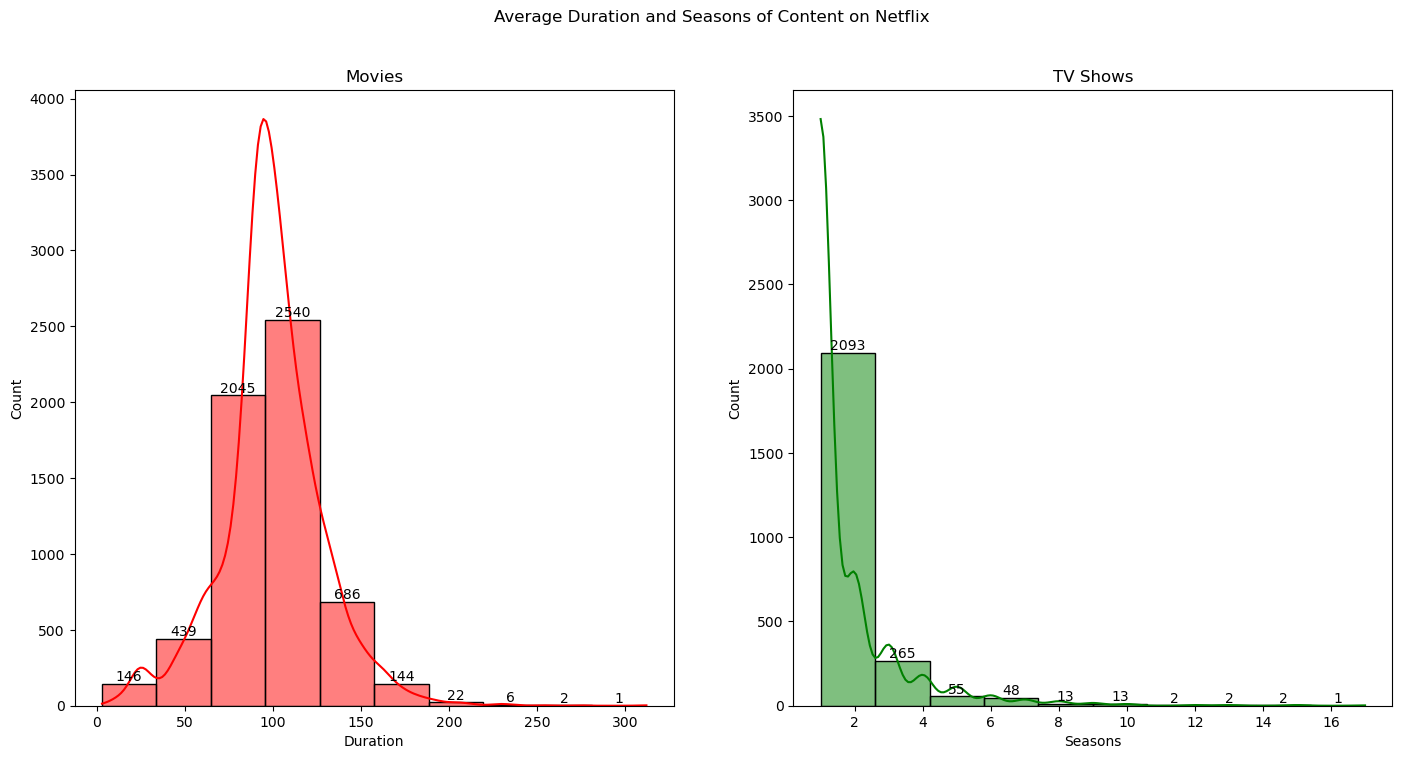

In [77]:
# Histogram ---
df_movies_temp = df_movies.drop_duplicates(subset = ['duration', 'title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['seasons', 'title'])

plt.figure(figsize = (17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int), bins = 10, kde = True, color='red' )
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')



plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int), bins = 10, kde = True,color='green' )  # for know any point then use "shift + tab"
for i in label.containers: 
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

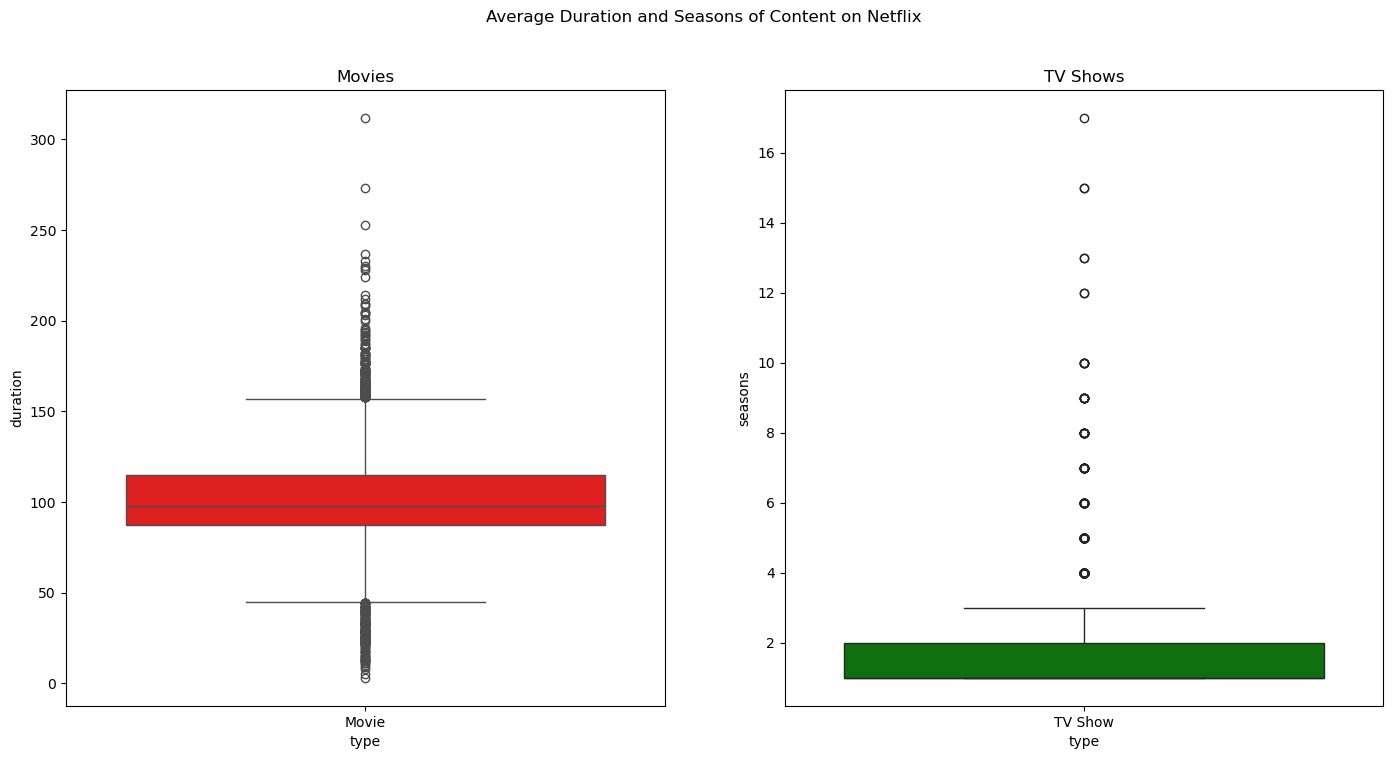

In [78]:
# check outliers  use -- check BoxPlot  -- it is on the numerical values.

df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize = (17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x = 'type', y = 'duration', color = 'red')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x = 'type', y = 'seasons', color = 'green')
plt.title('TV Shows')
plt.show()

In [79]:
#pip install wordcloud  --- I have already install it.
from wordcloud import WordCloud

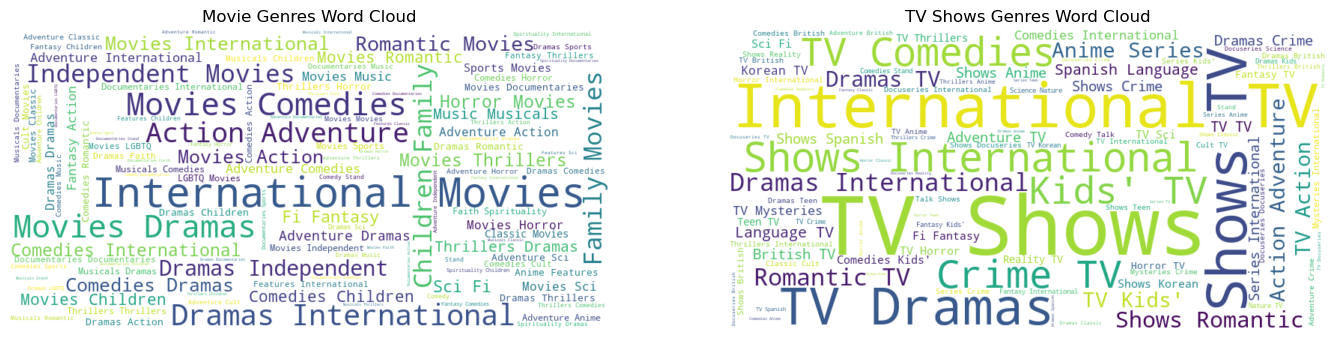

In [80]:
# Word Cloud graph
genre_text = " ".join(df_movies['genre'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(genre_text)

plt.figure(figsize = (17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Movie Genres Word Cloud')

genre_text = " ".join (df_tvs['genre'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('TV Shows Genres Word Cloud')

plt.show()